In [2]:
# # installing minisom module
# !pip install minisom

In [1]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# MNIST 

In [2]:
digits = datasets.load_digits(n_class=10)
data = digits.data
data.shape

(1797, 64)

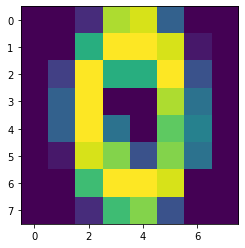

In [3]:
plt.imshow(data[55].reshape(8, 8))

In [4]:
data = scale(data)
num = digits.target
num.shape

(1797,)

In [5]:
num[55]

0

In [6]:
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)

 [  573 / 5000 ]  11% - 0:00:01 left 

 [ 1145 / 5000 ]  23% - 0:00:01 left 

 [ 1721 / 5000 ]  34% - 0:00:01 left 

 [ 2250 / 5000 ]  45% - 0:00:00 left 

 [ 2834 / 5000 ]  57% - 0:00:00 left 

 [ 3439 / 5000 ]  69% - 0:00:00 left 

 [ 4022 / 5000 ]  80% - 0:00:00 left 

 [ 4593 / 5000 ]  92% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.990660623528833


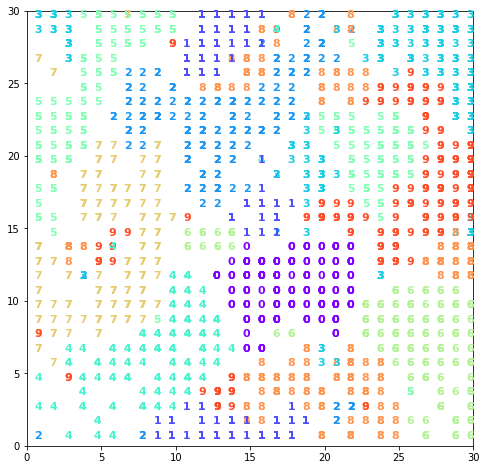

In [7]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+0.5, w[1]+0.5, str(t),
            color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold',
                                                  'size':11})
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.savefig('som_digits.png')
plt.show()

In [8]:
som.get_weights().shape

(30, 30, 64)

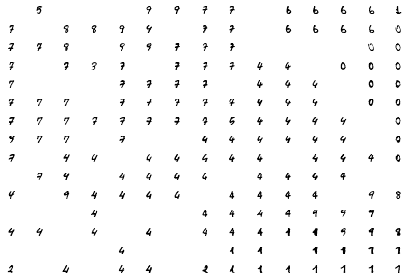

In [10]:
cnt = 0
for j in reversed(range(15)):  # images mosaic
    for i in range(15):
        plt.subplot(15, 15, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_digts_imgs.png')
plt.show()

# FashionMnist 

In [11]:
import pandas as pd

In [13]:
fashion = pd.read_csv('fashion/fashion-mnist_train.csv')
fashion.shape

(60000, 785)

In [14]:
fashion_labels = fashion['label'].to_numpy()
fashion_data = fashion.iloc[:, 1:].to_numpy()

In [15]:
fashion_labels.shape, fashion_data.shape

((60000,), (60000, 784))

In [16]:
fashion['label'].nunique()

10

In [17]:
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(fashion_data)
som.train(fashion_data, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1061.4214008829138


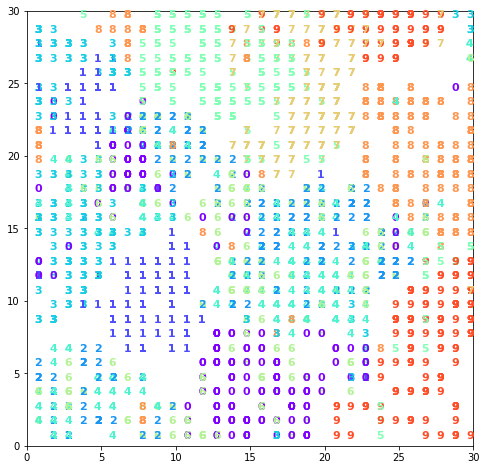

In [18]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(fashion_data[: 2000], fashion_labels[:2000]):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_fashion.png')
plt.show()

In [19]:
np.sqrt(784)

28.0

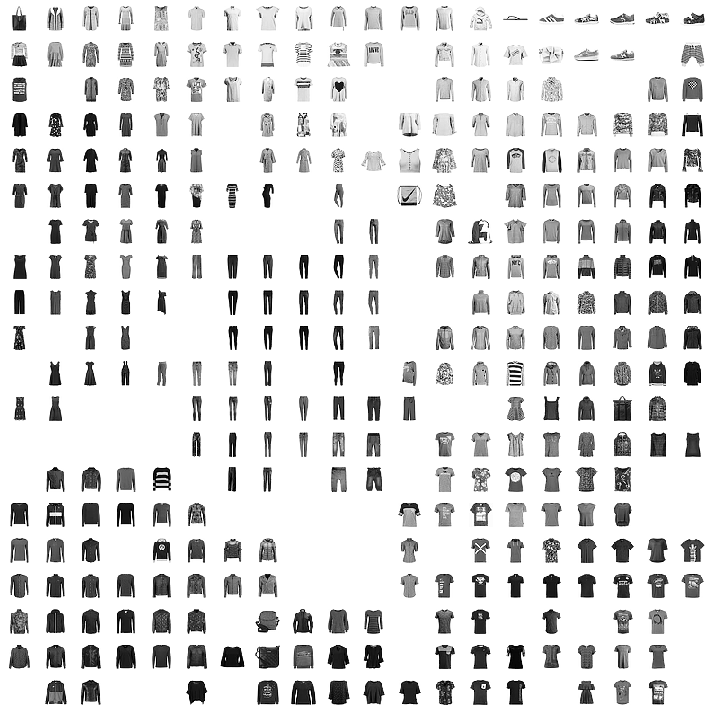

In [20]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(fashion_data[wmap[(i, j)]].reshape(28, 28),
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_fashion_imgs.png')
plt.show()